In [3]:
import pickle
import json

import os
import numpy as np

import ipywidgets as widgets
from IPython.display import display,clear_output

In [4]:
os.chdir('/content/drive/MyDrive/doutorado/topicos nlp/trabalho2/')

In [5]:
!ls

best_w2v_model_.pth  dataset_lstm.pth	 model_lstm.pth
corpusFile.p	     dataset_mesclado.p  model.pth
dataset0.p	     dataset.pth	 raw_data
dataset1.p	     dataset_trabalho.p  test_trainer
dataset2.p	     labels.p		 word2vec_gensim.model


## Parte 1 - Criação do arquivo de dataset e agregação dos dados crawleados

In [6]:
data = []  # ead + Kahoot
data1 = [] # ensino+AND+kahoot
data2 = [] # aula online+AND+kahoot
data3 = [] # remoto+AND+kahoot

for line in open('raw_data/dataset.json', 'r'):
    data.append(json.loads(line))

for line in open('raw_data/dataset1.json', 'r'):
    data1.append(json.loads(line))
for line in open('raw_data/dataset2.json', 'r'):
    data2.append(json.loads(line))
for line in open('raw_data/dataset3.json', 'r'):
    data3.append(json.loads(line))

data4 = [] #ead OR aula online OR ensino remoto
for line in open('raw_data/dataset4.json', 'r'):
    data4.append(json.loads(line))

In [7]:
print(np.shape(data), np.shape(data1), np.shape(data2), np.shape(data3), np.shape(data4))
print(type(data))

(181,) (94,) (42,) (16,) (700,)
<class 'list'>


In [8]:
data[0]['content']

'kahoot! por hoy te odio ):'

In [9]:
joined = data+data1+data2+data3

tweets0 = [{'tweet': el['content']} for el in joined]

tweets1 = [{'tweet': el['content']} for el in data4]

tweets2 = tweets0+tweets1

print(np.shape(joined), np.shape(tweets0), type(tweets0))
print(np.shape(data4), np.shape(tweets1), type(tweets1))
print(np.shape(tweets2), type(tweets2))

(333,) (333,) <class 'list'>
(700,) (700,) <class 'list'>
(1033,) <class 'list'>


In [10]:
tweets0[264]

{'tweet': 'Com o uso do aplicativo Kahoot nas aulas de Física do 1° Ano do Ensino Médio, os alunos estudaram os conteúdos de Dinâmica com uma abordagem baseada em jogos e tiveram a oportunidade de aprender enquanto se… https://t.co/OtsYRsQSqN'}

In [ ]:
joined[264]

{'_type': 'snscrape.modules.twitter.Tweet',
 'cashtags': None,
 'content': 'Com o uso do aplicativo Kahoot nas aulas de Física do 1° Ano do Ensino Médio, os alunos estudaram os conteúdos de Dinâmica com uma abordagem baseada em jogos e tiveram a oportunidade de aprender enquanto se… https://t.co/OtsYRsQSqN',
 'conversationId': 1290433401175060483,
 'coordinates': None,
 'date': '2020-08-03T23:44:32+00:00',
 'hashtags': None,
 'id': 1290433401175060483,
 'inReplyToTweetId': None,
 'inReplyToUser': None,
 'lang': 'pt',
 'likeCount': 0,
 'media': None,
 'mentionedUsers': None,
 'outlinks': ['https://www.instagram.com/p/CDcjB4Opvp5/?igshid=1k3op2pyyh4ur'],
 'place': None,
 'quoteCount': 0,
 'quotedTweet': None,
 'renderedContent': 'Com o uso do aplicativo Kahoot nas aulas de Física do 1° Ano do Ensino Médio, os alunos estudaram os conteúdos de Dinâmica com uma abordagem baseada em jogos e tiveram a oportunidade de aprender enquanto se… instagram.com/p/CDcjB4Opvp5/…',
 'replyCount': 0,
 're

In [11]:
dataset0 = tweets0
dataset1 = tweets1
dataset2 = tweets2

In [ ]:
with open('dataset0.p', 'wb') as f: #only kahoot related
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(dataset0, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dataset1.p', 'wb') as f: #only ead related
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(dataset1, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dataset2.p', 'wb') as f: #only ead related
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(dataset2, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle

with open('dataset0.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    dataset0 = pickle.load(f)


In [ ]:
print(type(dataset0), dataset0[0]['tweet'])

In [ ]:
dataset0[0]['tweet']

In [ ]:
dataset = dataset2

In [ ]:
len(dataset)

In [ ]:
label = ['undef']*len(dataset)

In [ ]:
label

In [ ]:
# mude aqui a posiçao inicial para comecar a rotular os dados
actual = 0

In [ ]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

def on_change(change):
    global label
    if change['type'] == 'change' and change['name'] == 'value':
        label[actual] = change['new']
        

def get_form(actual):
    form_items = [Textarea(str(actual)),
        Textarea(dataset[actual]['tweet']),
        Dropdown(value = label[actual],options=['undef','positivo', 'neutro', 'negativo']),
        next_button,
        previous_button
    ]
    form_items[2].observe(on_change)
    form = Box(form_items, layout=Layout(
        display='flex',
        height = '100%',
        flex_flow='column',
        border='solid 2px',
        align_items='stretch',
        width='50%'
    ))
    return form



def on_change_next(change):
    global actual
    if actual < len(dataset):
        clear_output()
        actual += 1
        display(get_form(actual))

def on_change_previous(change):
    global actual    
    if actual > 0:
        clear_output()
        actual -= 1
        display(get_form(actual))

next_button = Button(description='next')
previous_button = Button(description='previous')

next_button.on_click(on_change_next)
previous_button.on_click(on_change_previous)

display(get_form(actual))


In [ ]:
dataset[0]

In [ ]:
label[0:32]

In [ ]:
actual

In [ ]:
label[1801:2101]

In [ ]:
import numpy as np
np.unique(label, return_counts=True)

In [ ]:
# se quiser dar uma pausa na rotulacao, salve o trabalho feito com o comando a baixo
handler = open('labels.p','wb')
pickle.dump(label, handler)
handler.close()

In [ ]:
# para retomar a rotulacao execute a linha a baixo
label = pickle.load(open('labels.p','rb'))

In [ ]:
labels = np.array(label)
np.where(labels == 'undef')

### Salvar o dataset e rótulos de trabalho

In [ ]:
'''
dataset_mesclado.p e labels.p serão um backup de trabalho
'''
handler = open('dataset_mesclado.p','wb')
pickle.dump(dataset, handler)
handler.close()

handler = open('labels.p','wb')
pickle.dump(label, handler)
handler.close()

In [ ]:
body = [el['tweet'] for el in dataset]

dataset_trabalho = {'tweets': body, 'labels':label}
len(dataset_trabalho['tweets']), len(dataset_trabalho['labels'])

In [ ]:
'''
versão final do dataset para o trabalho
'''
handler = open('corpusFile.p','wb')
pickle.dump(dataset_trabalho, handler)
handler.close()

# Parte 2 - Classificadores

## Pré processamento de dados

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
from string import punctuation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer

from PIL import Image as PImage
from IPython.display import Image

In [13]:
os.chdir('/content/drive/MyDrive/doutorado/topicos nlp/trabalho2/')

In [14]:
dataset = pickle.load(open('corpusFile.p','rb'))

In [15]:
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
data = pd.DataFrame()
data['tweets'] = dataset['tweets']
data['sentiment'] = dataset['labels']
data['labels'] = [0 if val == 'negativo' else 1 if val == 'neutro' else 2 for val in data['sentiment'] ]


print(np.unique(data['sentiment'], return_counts=True))

(array(['negativo', 'neutro', 'positivo'], dtype=object), array([498, 300, 235]))


In [17]:
pd.set_option('display.max_rows', 10)  #reset option
data

,tweets,sentiment,labels
0,kahoot! por hoy te odio ):,neutro,1
1,Vou montar um bingo da matéria que vai ser rui...,neutro,1
2,agora deu o carai ome perdeu o kahoot todinho ...,negativo,0
3,jamais vou perdoar o EAD pela popularização do...,negativo,0
4,coisas que só acontecem na aula EAD: dormi mai...,neutro,1
...,...,...,...
1028,"@Danielrossanoo ""Ensino Remoto Emergencial"", é...",negativo,0
1029,coisas boas do ensino remoto é simplesmente sa...,positivo,2
1030,"estamos em ensino remoto, eles estão juntos, b...",neutro,1
1031,hoje estou triste pois uma aluna chata falou n...,negativo,0


In [18]:
data['tweets'][0], len(data['tweets'])

('kahoot! por hoy te odio ):', 1033)

In [19]:
data = data.drop([0, 81, 305, 307, 317, 318, 320, 329, 331, 332])  # 0, 81, 305, 307, 317, 318, 320, 329, 331, 332  #sobrou alguns tweets em outros idiomas
data = data.reset_index()
data['tweets'][0], len(data['tweets'])

('Vou montar um bingo da matéria que vai ser ruim no ead, ajudem ai\n\nKahoot\n“Precisamos da participação de vocês”\nAtividades toda semana\nTrabalho em grupo (professores que escolhem os grupos)',
 1023)

In [20]:
#!pip install Unidecode
#import unidecode   #não empregado pois remove os emojis

def preprocess(text):
  new_text = []
  regex = r"^[\w\.\+\-]+\@[\w]+\.[a-z]{2,3}$"

  for line in text.split('\n'):
    l = []
    for t in line.split(" "):
        t = '@usuario' if t.startswith('@') and len(t) > 1 else t
        t = '@hashtag' if t.startswith('#') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        t = 'email' if re.fullmatch(regex, t) else t
        #t = t.translate(table)
        l.append(t)
    new_text.append(' '.join(l)+'\n')
        
  return " ".join(new_text)

In [21]:
#deixar tudo em minúsculo - não foi adotado visto diminuir a acurácia
#data['tweets'] = data['tweets'].str.lower()

punct = "".join([c for c in punctuation if c != '@']) #@ indica usuario
table = {p: None for p in punct}

print(table)

{'!': None, '"': None, '#': None, '$': None, '%': None, '&': None, "'": None, '(': None, ')': None, '*': None, '+': None, ',': None, '-': None, '.': None, '/': None, ':': None, ';': None, '<': None, '=': None, '>': None, '?': None, '[': None, '\\': None, ']': None, '^': None, '_': None, '`': None, '{': None, '|': None, '}': None, '~': None}


In [22]:
prep_data = [preprocess(t) for t in data['tweets']]
prep_data

['Vou montar um bingo da matéria que vai ser ruim no ead, ajudem ai\n \n Kahoot\n “Precisamos da participação de vocês”\n Atividades toda semana\n Trabalho em grupo (professores que escolhem os grupos)\n',
 'agora deu o carai ome perdeu o kahoot todinho odeio o ead porém sigo feliz amores a felicidade é meu nome\n',
 'jamais vou perdoar o EAD pela popularização do Kahoot\n',
 'coisas que só acontecem na aula EAD: dormi mais da metade da aula, acordei na hora do teste de kahoot, acertei 9 questões de 10 e fiquei na quinta posição. Meu nome na plataforma: "sono". http\n',
 'melhor coisa q o ead trouxe foi o kahoot valendo ponto na média\n',
 'meu deus eu amo aula no kahoot é a única coisa possível do EAD\n',
 'Esse semestre to tao esgotada de ter que fazer matérias que envolvam montar aulas (serio to sem cabeça pra montar aula depois de 2 anos vivendo fudidamente nessa pandemia e tendo que continuar) que qualquer atividade ead que envolva isso eu vou usar o kahoot sim\n',
 'kahoot foi um

In [23]:
data['tweets'] = prep_data

In [24]:
pd.set_option('display.max_rows', data.shape[0]+1)
data

,index,tweets,sentiment,labels
0,1,Vou montar um bingo da matéria que vai ser rui...,neutro,1
1,2,agora deu o carai ome perdeu o kahoot todinho ...,negativo,0
2,3,jamais vou perdoar o EAD pela popularização do...,negativo,0
3,4,coisas que só acontecem na aula EAD: dormi mai...,neutro,1
4,5,melhor coisa q o ead trouxe foi o kahoot valen...,positivo,2
5,6,meu deus eu amo aula no kahoot é a única coisa...,positivo,2
6,7,Esse semestre to tao esgotada de ter que fazer...,neutro,1
7,8,kahoot foi uma das melhores coisas da ead http\n,positivo,2
8,9,é foda pagar faculdade p aula ser em joguinho ...,negativo,0
9,10,melhor coisa do ead eh o kahoot\n,positivo,2


In [25]:
pd.set_option('display.max_rows', 10)  #reset option

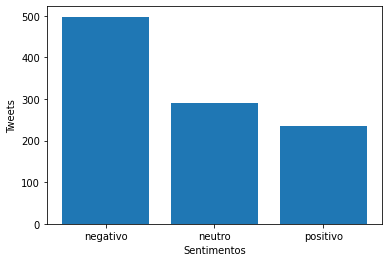

In [26]:
sentiment_count=data.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['tweets'])
plt.xlabel('Sentimentos')
plt.ylabel('Tweets')
plt.show()

In [27]:
sentiment_count.index.values

array(['negativo', 'neutro', 'positivo'], dtype=object)

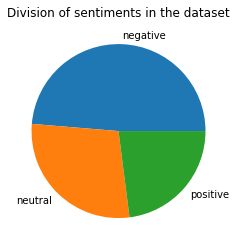

In [28]:
sentiment_count=data.groupby('sentiment').count()
#plt.pie(sentiment_count['tweets'], labels=sentiment_count.index.values)
plt.pie(sentiment_count['tweets'], labels=['negative', 'neutral', 'positive'])
plt.title('Division of sentiments in the dataset')
plt.show()

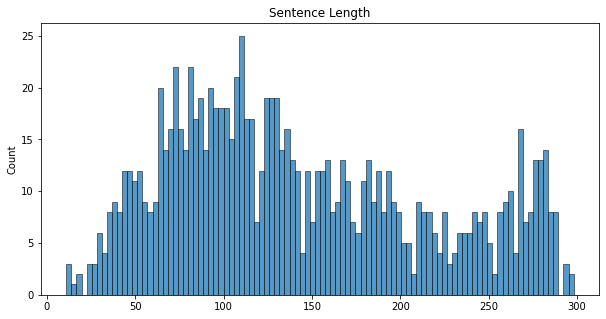

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in data['tweets']], bins=100)
plt.title('Sentence Length')
plt.show()

In [30]:
#importante para o padding
max_len  = max([len(sent) for sent in data['tweets']])
mean_len = sum([len(sent) for sent in data['tweets']])/ len(data['tweets'])
print('Max length: ', max_len, mean_len)

Max length:  298 142.5073313782991


In [31]:
data['tweets'][0]

'Vou montar um bingo da matéria que vai ser ruim no ead, ajudem ai\n \n Kahoot\n “Precisamos da participação de vocês”\n Atividades toda semana\n Trabalho em grupo (professores que escolhem os grupos)\n'

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    list(data['tweets']), list(data['labels']), test_size=0.3, random_state=42)

In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([340, 204, 172]))

## Naive bayes

### Rotina de avaliação do classificador

In [34]:
def evaluate_metrics(exp_name, pred, target):

  conf_matrix = metrics.confusion_matrix(target, pred)
  acc = metrics.accuracy_score(target, pred)
  precision = metrics.precision_score(target, pred, average='macro')
  recall = metrics.recall_score(target, pred, average='macro')
  f1 = metrics.f1_score(target, pred, average='macro')

  print('Confusion matrix')
  print(conf_matrix)
  print('')

  print(f'Accuracy score: {acc}')
  print('')

  print(f"Precision score: {precision}")
  print('')

  print(f"Recall score: {recall}")
  print('')

  print(f"F1 score: {f1}")
  print('')

  return (exp_name, conf_matrix, acc, precision, recall, f1)

### Definição do classificador, treinamento e avaliação

In [35]:
stop_words=set(stopwords.words("portuguese"))
print(stop_words)

{'estiveram', 'tinha', 'teus', 'qual', 'houvera', 'serão', 'tivéssemos', 'teriam', 'tenha', 'me', 'estejamos', 'vocês', 'houvemos', 'houverão', 'estávamos', 'nosso', 'hão', 'às', 'sejamos', 'sejam', 'estou', 'numa', 'teremos', 'estes', 'muito', 'tu', 'tivermos', 'forem', 'meu', 'estivessem', 'houvessem', 'elas', 'suas', 'terão', 'de', 'que', 'os', 'dele', 'estivermos', 'à', 'vos', 'seriam', 'depois', 'um', 'houverei', 'meus', 'seus', 'uma', 'temos', 'também', 'isso', 'fôssemos', 'sem', 'com', 'tivesse', 'se', 'estamos', 'há', 'aquele', 'tivéramos', 'houvéramos', 'seja', 'não', 'para', 'hei', 'estive', 'sou', 'ela', 'houvéssemos', 'dela', 'tém', 'terá', 'fosse', 'aqueles', 'estiver', 'será', 'eu', 'houverem', 'houverá', 'aos', 'tiveram', 'tivera', 'tenham', 'essa', 'tenhamos', 'nós', 'ou', 'essas', 'esta', 'fomos', 'nossa', 'nossos', 'esteve', 'haja', 'estão', 'nossas', 'tem', 'mesmo', 'seria', 'formos', 'somos', 'tenho', 'esse', 'e', 'a', 'estava', 'você', 'quando', 'só', 'fossem', 'se

In [36]:
dataNB = data.copy()
x1 = [re.sub(r'[^\w\s-]', '', word).rstrip() for word in dataNB['tweets']]

dataNB['tweets'] = x1

In [37]:
tweet_tokenizer = TweetTokenizer()

tokens = [tweet_tokenizer.tokenize(el) for el in dataNB['tweets']]

all_tokens = []
for token in tokens:
  all_tokens +=token

In [38]:
all_tokens

['Vou',
 'montar',
 'um',
 'bingo',
 'da',
 'matéria',
 'que',
 'vai',
 'ser',
 'ruim',
 'no',
 'ead',
 'ajudem',
 'ai',
 'Kahoot',
 'Precisamos',
 'da',
 'participação',
 'de',
 'vocês',
 'Atividades',
 'toda',
 'semana',
 'Trabalho',
 'em',
 'grupo',
 'professores',
 'que',
 'escolhem',
 'os',
 'grupos',
 'agora',
 'deu',
 'o',
 'carai',
 'ome',
 'perdeu',
 'o',
 'kahoot',
 'todinho',
 'odeio',
 'o',
 'ead',
 'porém',
 'sigo',
 'feliz',
 'amores',
 'a',
 'felicidade',
 'é',
 'meu',
 'nome',
 'jamais',
 'vou',
 'perdoar',
 'o',
 'EAD',
 'pela',
 'popularização',
 'do',
 'Kahoot',
 'coisas',
 'que',
 'só',
 'acontecem',
 'na',
 'aula',
 'EAD',
 'dormi',
 'mais',
 'da',
 'metade',
 'da',
 'aula',
 'acordei',
 'na',
 'hora',
 'do',
 'teste',
 'de',
 'kahoot',
 'acertei',
 '9',
 'questões',
 'de',
 '10',
 'e',
 'fiquei',
 'na',
 'quinta',
 'posição',
 'Meu',
 'nome',
 'na',
 'plataforma',
 'sono',
 'http',
 'melhor',
 'coisa',
 'q',
 'o',
 'ead',
 'trouxe',
 'foi',
 'o',
 'kahoot',
 'vale

In [39]:
cv = CountVectorizer(lowercase=True,stop_words=stop_words,ngram_range = (1,1),tokenizer = tweet_tokenizer.tokenize)

In [40]:
text_counts= cv.fit_transform(dataNB['tweets'])

In [41]:
np.shape(text_counts)

(1023, 4029)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, list(dataNB['labels']), test_size=0.3, random_state=42)

In [43]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [44]:
evaluate_metrics('Removendo_stop_words', predicted, y_test)

Confusion matrix
[[135  10  13]
 [ 53  20  13]
 [ 39   5  19]]

Accuracy score: 0.5667752442996743

Precision score: 0.5294548166794862

Recall score: 0.4628586069563403

F1 score: 0.4612430218490824



('Removendo_stop_words', array([[135,  10,  13],
        [ 53,  20,  13],
        [ 39,   5,  19]]), 0.5667752442996743, 0.5294548166794862, 0.4628586069563403, 0.4612430218490824)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


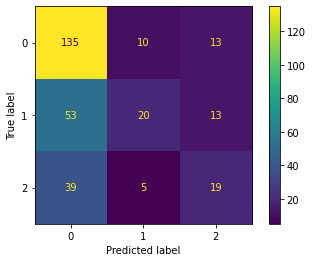

In [45]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [47]:
with open('naive_bayes_clf.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

### Usando corte mínimo de Luhn

In [48]:
flattened_data = "".join(dataNB['tweets'])
tokens = tweet_tokenizer.tokenize(flattened_data) 
fdist = FreqDist(tokens)

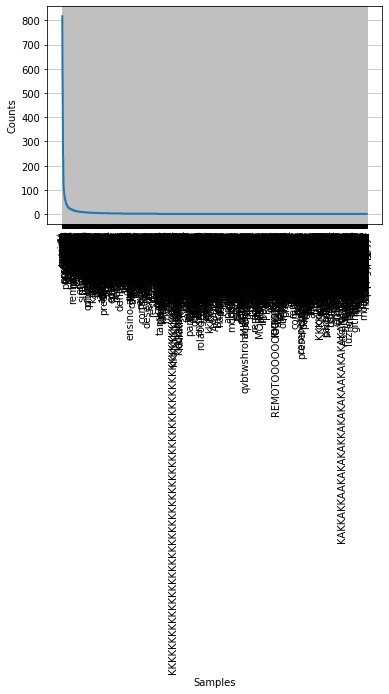

In [49]:
fdist.plot(cumulative=False)
plt.show()

In [50]:
print(fdist.most_common())

[('de', 817), ('ensino', 731), ('aula', 673), ('remoto', 588), ('que', 565), ('e', 561), ('a', 533), ('o', 530), ('no', 446), ('do', 393), ('eu', 335), ('não', 333), ('é', 306), ('em', 245), ('pra', 241), ('da', 235), ('com', 231), ('um', 202), ('na', 198), ('uma', 194), ('kahoot', 170), ('mais', 133), ('q', 118), ('me', 111), ('os', 110), ('ead', 108), ('se', 105), ('mas', 102), ('presencial', 100), ('EAD', 98), ('ter', 96), ('as', 95), ('por', 89), ('tem', 87), ('para', 86), ('minha', 82), ('meu', 80), ('fazer', 78), ('online', 75), ('só', 74), ('professor', 74), ('ser', 73), ('Kahoot', 72), ('gente', 69), ('já', 67), ('pq', 66), ('sem', 65), ('como', 63), ('isso', 62), ('tá', 61), ('foi', 60), ('vai', 59), ('vou', 59), ('alunos', 59), ('sala', 59), ('aulas', 56), ('ao', 56), ('coisa', 55), ('professora', 52), ('esse', 50), ('muito', 49), ('n', 49), ('nem', 49), ('até', 48), ('dar', 47), ('usuario', 47), ('ainda', 46), ('ou', 45), ('tô', 44), ('assistir', 44), ('Ensino', 43), ('quand

In [51]:
#observando as menores frequências, estabelece-se um limiar de corte
N_MIN = 1
min_freq_tokens = [el for el in fdist.most_common() if el[1]<=N_MIN]

print(min_freq_tokens)
print(len(min_freq_tokens))

[('bingo', 1), ('Precisamos', 1), ('Atividades', 1), ('Trabalho', 1), ('escolhem', 1), ('gruposagora', 1), ('carai', 1), ('ome', 1), ('sigo', 1), ('nomejamais', 1), ('perdoar', 1), ('popularização', 1), ('Kahootcoisas', 1), ('posição', 1), ('sono', 1), ('httpmelhor', 1), ('médiameu', 1), ('EADEsse', 1), ('esgotada', 1), ('envolvam', 1), ('fudidamente', 1), ('envolva', 1), ('simkahoot', 1), ('httpé', 1), ('pagar', 1), ('desanimo', 1), ('EADmelhor', 1), ('Microsoft', 1), ('classroom', 1), ('contavam', 1), ('eadfaz', 1), ('kahoottem', 1), ('misericordia', 1), ('tudoEsses', 1), ('Senai', 1), ('kahootQUAL', 1), ('DIFICULDADE', 1), ('ESCREVER', 1), ('FORMS', 1), ('SOCRATIVE', 1), ('QUESTIONÁRIO', 1), ('ATÉ', 1), ('SERVIA', 1), ('4⁰', 1), ('KAHOOTJogamos', 1), ('Ricardo', 1), ('fina', 1), ('tamalucoLembrando', 1), ('kkkko', 1), ('KAHOOTCoisas', 1), ('GSA', 1), ('E-mail', 1), ('Jamboard', 1), ('PDF', 1), ('pesquisarusuario', 1), ('CAGAVA', 1), ('entrava', 1), ('vácuo', 1), ('Tu', 1), ('estímul

In [52]:
MIN_CUT = len(min_freq_tokens)

In [53]:
last_min = FreqDist(dict(fdist.most_common()[-MIN_CUT:]))
print(last_min.most_common())

[('bingo', 1), ('Precisamos', 1), ('Atividades', 1), ('Trabalho', 1), ('escolhem', 1), ('gruposagora', 1), ('carai', 1), ('ome', 1), ('sigo', 1), ('nomejamais', 1), ('perdoar', 1), ('popularização', 1), ('Kahootcoisas', 1), ('posição', 1), ('sono', 1), ('httpmelhor', 1), ('médiameu', 1), ('EADEsse', 1), ('esgotada', 1), ('envolvam', 1), ('fudidamente', 1), ('envolva', 1), ('simkahoot', 1), ('httpé', 1), ('pagar', 1), ('desanimo', 1), ('EADmelhor', 1), ('Microsoft', 1), ('classroom', 1), ('contavam', 1), ('eadfaz', 1), ('kahoottem', 1), ('misericordia', 1), ('tudoEsses', 1), ('Senai', 1), ('kahootQUAL', 1), ('DIFICULDADE', 1), ('ESCREVER', 1), ('FORMS', 1), ('SOCRATIVE', 1), ('QUESTIONÁRIO', 1), ('ATÉ', 1), ('SERVIA', 1), ('4⁰', 1), ('KAHOOTJogamos', 1), ('Ricardo', 1), ('fina', 1), ('tamalucoLembrando', 1), ('kkkko', 1), ('KAHOOTCoisas', 1), ('GSA', 1), ('E-mail', 1), ('Jamboard', 1), ('PDF', 1), ('pesquisarusuario', 1), ('CAGAVA', 1), ('entrava', 1), ('vácuo', 1), ('Tu', 1), ('estímul

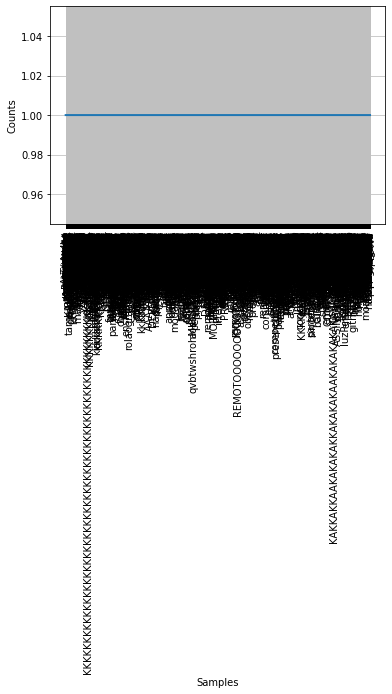

In [54]:
last_min.plot(MIN_CUT, cumulative=False)
plt.show()

In [55]:
stop_words_luhn_min = [el[0] for el in last_min]

In [56]:
cv = CountVectorizer(lowercase=True,ngram_range = (1,1),tokenizer=tweet_tokenizer.tokenize, stop_words=stop_words_luhn_min)

In [57]:
text_counts= cv.fit_transform(dataNB['tweets'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['y'] not in stop_words.
  % sorted(inconsistent)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, list(dataNB['labels']), test_size=0.3, random_state=42)

In [59]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [60]:
evaluate_metrics('Corte_minimo', predicted, y_test)

Confusion matrix
[[140   8  10]
 [ 57  21   8]
 [ 39   9  15]]

Accuracy score: 0.5732899022801303

Precision score: 0.5334657908252912

Recall score: 0.4561190779913182

F1 score: 0.4539565252988374



('Corte_minimo', array([[140,   8,  10],
        [ 57,  21,   8],
        [ 39,   9,  15]]), 0.5732899022801303, 0.5334657908252912, 0.4561190779913182, 0.4539565252988374)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


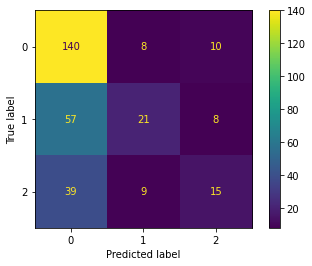

In [61]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [62]:
with open('naive_bayes_luhn_cut_clf.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

## Teste com a utilização de Word2Vec

In [63]:
import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import RSLPStemmer

import torch
import torch.nn as nn

import os
import tqdm

from wordcloud import WordCloud

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [65]:
flattened_data = "".join(data['tweets'])

tokens = tweet_tokenizer.tokenize(flattened_data)


scorpus = []
for inst in data['tweets']:
    scorpus += sent_tokenize(inst)
scorpus[1], len(scorpus)

('agora deu o carai ome perdeu o kahoot todinho odeio o ead porém sigo feliz amores a felicidade é meu nome',
 1580)

In [66]:
fcorpus = []
for inst in data['tweets']:
  fcorpus += [tweet_tokenizer.tokenize(inst)]

len(fcorpus), fcorpus[0]

(1023,
 ['Vou',
  'montar',
  'um',
  'bingo',
  'da',
  'matéria',
  'que',
  'vai',
  'ser',
  'ruim',
  'no',
  'ead',
  ',',
  'ajudem',
  'ai',
  'Kahoot',
  '“',
  'Precisamos',
  'da',
  'participação',
  'de',
  'vocês',
  '”',
  'Atividades',
  'toda',
  'semana',
  'Trabalho',
  'em',
  'grupo',
  '(',
  'professores',
  'que',
  'escolhem',
  'os',
  'grupos',
  ')'])

In [67]:
tokenized_tweet = data['tweets'][0].split()
fcorpus[0]

['Vou',
 'montar',
 'um',
 'bingo',
 'da',
 'matéria',
 'que',
 'vai',
 'ser',
 'ruim',
 'no',
 'ead',
 ',',
 'ajudem',
 'ai',
 'Kahoot',
 '“',
 'Precisamos',
 'da',
 'participação',
 'de',
 'vocês',
 '”',
 'Atividades',
 'toda',
 'semana',
 'Trabalho',
 'em',
 'grupo',
 '(',
 'professores',
 'que',
 'escolhem',
 'os',
 'grupos',
 ')']

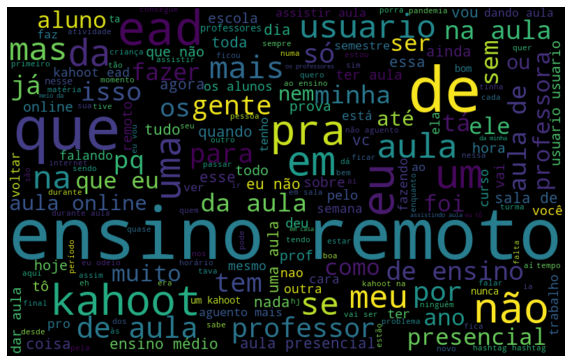

In [68]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(flattened_data)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [69]:
model = Word2Vec(size=300, min_count=2, window=3)

In [70]:
model.build_vocab(fcorpus)

In [71]:
words = model.wv.vocab.keys()

In [72]:
len(words), model.corpus_count

(1860, 1023)

In [73]:
model.wv.vector_size

300

In [74]:
model.train(fcorpus,total_examples=model.corpus_count,epochs=100)

(1756976, 2873200)

In [75]:
model.save("word2vec_gensim.model")

In [76]:
model = Word2Vec.load("word2vec_gensim.model")

In [77]:
model.wv.most_similar('kahoot')

[('Kahoot', 0.5347142815589905),
 ('pratica', 0.5309855341911316),
 ('respeita', 0.5307824611663818),
 ('questionário', 0.5122109651565552),
 ('auge', 0.511879563331604),
 ('botar', 0.5041271448135376),
 ('inventou', 0.5031570196151733),
 ('nosso', 0.5000367164611816),
 ('quiz', 0.49064087867736816),
 ('jogar', 0.48730576038360596)]

In [78]:
len(model.wv['kahoot']), model.wv['kahoot']

(300, array([-3.9829510e-01, -3.2876343e-01, -3.1898063e-01, -3.3858946e-01,
        -6.5149456e-02,  2.6088169e-01, -2.7120245e-01,  5.3490967e-01,
        -1.9992495e-01,  1.7045352e-01, -3.6144990e-02, -5.0527579e-01,
         5.7503533e-01, -1.8973948e-01,  7.8395683e-01, -1.2949774e+00,
         2.9085949e-01, -4.3469056e-01, -9.6228175e-02,  4.9645174e-01,
         5.9759337e-01, -2.6667038e-01,  2.7420968e-01,  1.5039589e-01,
        -2.6952845e-01,  5.1111686e-01, -7.7617519e-02,  6.5484536e-01,
        -1.8623383e-01, -3.9255473e-01, -3.3555314e-01,  1.3050705e-01,
        -1.3355836e+00, -5.6348443e-01,  3.6451083e-03, -7.1516651e-01,
         1.9637646e-01,  3.2053077e-01,  1.4696319e-01,  1.1187396e-01,
        -1.4476340e-01, -2.7067456e-01,  2.2889711e-01,  5.0259691e-01,
         5.5668491e-01,  1.7426953e-01, -5.0444931e-01,  6.7289603e-01,
         8.4545044e-03, -2.6264775e-01,  3.4849820e-01,  1.2118634e+00,
         3.7207350e-01, -3.3998421e-01, -8.1145149e-01, -4.

In [79]:
def word_vector(model, tokens, size):
  '''
  Take the mean of all wv in a tweet
  '''
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
      try:
          vec += model[word].reshape((1, size))
          count += 1.
      except KeyError:
          continue
  if count != 0:
      vec /= count
  return vec

In [80]:
wordvec_corpus = np.zeros((len(fcorpus), model.wv.vector_size))

In [81]:
for i,tweet in enumerate(fcorpus):
  wordvec_corpus[i,:] = word_vector(model, tweet, model.wv.vector_size)

wordvec_corpus.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


(1023, 300)

In [82]:
wordvec_corpus[0]

array([-0.15609294, -0.31901962, -0.22867971,  0.05398813,  0.14012235,
        0.30944958,  0.23846791, -0.0460692 , -0.10566689,  0.0099669 ,
        0.05006119,  0.26244249, -0.06171664,  0.00290413,  0.0199263 ,
       -0.14673176, -0.13974035, -0.06520279, -0.10951416,  0.0401478 ,
       -0.13906428, -0.23842736,  0.03080083, -0.03145772,  0.12418258,
       -0.00669782,  0.08241699, -0.19189888, -0.13955327, -0.09984105,
       -0.10921857, -0.06075036, -0.01713439, -0.02085372, -0.03135264,
       -0.04708684,  0.27310257,  0.1525304 ,  0.22792027, -0.09024517,
        0.09755167, -0.01430734,  0.00700217, -0.00649604,  0.13165784,
       -0.02864433,  0.07377981,  0.13864934, -0.01691055,  0.05735681,
       -0.23268642,  0.28291267,  0.15813127, -0.03655207, -0.10698891,
        0.12236628,  0.04965351,  0.10164861, -0.11055909, -0.06259986,
       -0.05082479, -0.09990068,  0.04532329, -0.19673746, -0.11010249,
        0.1155326 ,  0.0449823 ,  0.20669886, -0.04376184,  0.23

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    wordvec_corpus, list(data['labels']), test_size=0.3, random_state=42)

In [84]:
len(X_train), len(y_train), len(X_test), len(y_test)

(716, 716, 307, 307)

In [85]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [86]:
evaluate_metrics('W2vec Decision Tree', predicted, y_test)

Confusion matrix
[[86 39 33]
 [30 34 22]
 [27 16 20]]

Accuracy score: 0.4560260586319218

Precision score: 0.41669591332512673

Recall score: 0.4190376507126581

F1 score: 0.4166183574879227



('W2vec Decision Tree', array([[86, 39, 33],
        [30, 34, 22],
        [27, 16, 20]]), 0.4560260586319218, 0.41669591332512673, 0.4190376507126581, 0.4166183574879227)

In [87]:
with open('w2vec_dt.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

In [88]:
clf = LogisticRegression(solver='lbfgs', multi_class='ovr', class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [89]:
evaluate_metrics('W2vec Logistic regression', predicted, y_test)

Confusion matrix
[[82 39 37]
 [24 38 24]
 [20  9 34]]

Accuracy score: 0.501628664495114

Precision score: 0.4835162842506784

Recall score: 0.5001767821903235

F1 score: 0.48323500022803884



('W2vec Logistic regression', array([[82, 39, 37],
        [24, 38, 24],
        [20,  9, 34]]), 0.501628664495114, 0.4835162842506784, 0.5001767821903235, 0.48323500022803884)

In [90]:
with open('w2vec_lr.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

In [91]:
clf = svm.SVC(kernel='linear', C=1, probability=True, class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [92]:
evaluate_metrics('w2vec SVM', predicted, y_test)

Confusion matrix
[[81 38 39]
 [28 42 16]
 [20 12 31]]

Accuracy score: 0.501628664495114

Precision score: 0.4816312773845635

Recall score: 0.49769793764494974

F1 score: 0.48415914174115837



('w2vec SVM', array([[81, 38, 39],
        [28, 42, 16],
        [20, 12, 31]]), 0.501628664495114, 0.4816312773845635, 0.49769793764494974, 0.48415914174115837)

In [93]:
with open('w2vec_svm.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

In [94]:
clf = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3, )
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [95]:
evaluate_metrics('XGBoost', predicted, y_test)

Confusion matrix
[[118  28  12]
 [ 41  33  12]
 [ 33  13  17]]

Accuracy score: 0.5472312703583062

Precision score: 0.4917211418735809

Recall score: 0.46679921437060085

F1 score: 0.4712362637362637



('XGBoost', array([[118,  28,  12],
        [ 41,  33,  12],
        [ 33,  13,  17]]), 0.5472312703583062, 0.4917211418735809, 0.46679921437060085, 0.4712362637362637)

In [96]:
with open('w2vec_xgboost.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

### Visualizando os clusters

In [97]:
def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
          vecs.append(model[word].reshape((1,model.wv.vector_size)))
        except KeyError:
          continue
    print(np.shape(vecs))
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values


In [98]:
negative_list = np.array(fcorpus)[data['labels'].index[data['labels'] == 0]]
neutral_list = np.array(fcorpus)[data['labels'].index[data['labels'] == 1]]
positive_list = np.array(fcorpus)[data['labels'].index[data['labels'] == 2]]

wordvec_negative = np.zeros((len(negative_list), model.wv.vector_size))
wordvec_neutral = np.zeros((len(neutral_list), model.wv.vector_size))
wordvec_positive = np.zeros((len(positive_list), model.wv.vector_size))

for i,tweet in enumerate(negative_list):
  wordvec_negative[i,:] = word_vector(model, tweet, model.wv.vector_size)
for i,tweet in enumerate(neutral_list):
  wordvec_neutral[i,:] = word_vector(model, tweet, model.wv.vector_size)
for i,tweet in enumerate(positive_list):
  wordvec_positive[i,:] = word_vector(model, tweet, model.wv.vector_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

In [99]:
data['labels'].index[data['labels'] == 0]


Int64Index([   1,    2,    8,   11,   12,   14,   15,   16,   20,   24,
            ...
            1000, 1003, 1004, 1005, 1009, 1012, 1014, 1016, 1018, 1021],
           dtype='int64', length=498)

In [100]:
negative_list[0], positive_list[0]

(['agora',
  'deu',
  'o',
  'carai',
  'ome',
  'perdeu',
  'o',
  'kahoot',
  'todinho',
  'odeio',
  'o',
  'ead',
  'porém',
  'sigo',
  'feliz',
  'amores',
  'a',
  'felicidade',
  'é',
  'meu',
  'nome'],
 ['melhor',
  'coisa',
  'q',
  'o',
  'ead',
  'trouxe',
  'foi',
  'o',
  'kahoot',
  'valendo',
  'ponto',
  'na',
  'média'])

In [101]:
498, 300, 235

(498, 300, 235)

In [102]:
wordvec_negative.shape, wordvec_neutral.shape, wordvec_positive.shape

((498, 300), (290, 300), (235, 300))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1023 samples in 0.001s...
[t-SNE] Computed neighbors for 1023 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1023
[t-SNE] Computed conditional probabilities for sample 1023 / 1023
[t-SNE] Mean sigma: 0.483197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.799202
[t-SNE] KL divergence after 5000 iterations: 1.893805


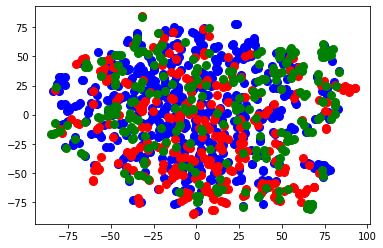

In [103]:
ts = TSNE(2, verbose=1, perplexity=10, n_iter=5000, init='pca', random_state=42)
reduced_vecs = ts.fit_transform(np.concatenate((wordvec_negative, wordvec_neutral, wordvec_positive)))

#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(wordvec_negative):
        #negative tweet words are colored blue
        color = 'b'
    elif i >= len(wordvec_negative) and i < (len(wordvec_negative) + len(wordvec_neutral)):
        #neutral tweet words colored red
        color = 'r'
    else:
        #positive tweet words colored green
        color = 'g'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, markersize=8)

## Utilizando LSTM

In [104]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [105]:
class TwitterLSTM(nn.Module):
    def __init__(self, dataset_len, size=128, hidden_size=128, layers=3, output_dim=3):
        super(TwitterLSTM, self).__init__()
        self.lstm_size = size
        self.hidden_size = hidden_size
        self.embedding_dim = size
        self.num_layers = layers

        n_vocab = dataset_len
        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
            padding_idx=0,
        )
        self.lstm = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=0.5,
            batch_first=True
        )
        self.fc = nn.Linear(self.hidden_size, output_dim)
        self.dropout = nn.Dropout(.3)

    def forward(self, x, prev_state):
        bs = x.size(0)
        embed = self.embedding(x)
        
        #print(np.shape(embed))
        output, (hidden, cell) = self.lstm(embed, prev_state)
        #print(np.shape(hidden))
        
        #output = output.contiguous().view(-1, self.hidden_size)

        #logits = self.fc(hidden[-1])
        output = self.dropout(output)
        logits = self.fc(output)
        #logits = logits.view(bs, -1)
        logits = logits[:,-1]
        

        return logits, (hidden, cell)

    def init_state(self, sequence_length):
        h, c = (torch.zeros(self.num_layers, sequence_length, self.lstm_size),
                torch.zeros(self.num_layers, sequence_length, self.lstm_size))
        h = h.to(device)
        c = c.to(device)
        return (h, c)

In [106]:
import torch
import pandas as pd
from collections import Counter

class Dataset(torch.utils.data.Dataset):
    def __init__(
        self,
        args,
        data,
        labels
    ):
        self.args = args
        self.data = data
        self.labels = labels
        self.words = self.load_words()
        self.uniq_words = self.get_uniq_words()

        self.index_to_word = {index+1: word for index, word in enumerate(self.uniq_words)}
        self.word_to_index = {word: index+1 for index, word in enumerate(self.uniq_words)}

        self.words_indexes = [self.word_to_index[w] for w in self.words]

    def load_words(self):
      wcorpus = []
      for inst in self.data:
        wcorpus += inst
      return wcorpus


    def get_uniq_words(self):
        word_counts = Counter(self.words)
        return sorted(word_counts, key=word_counts.get, reverse=True)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
      
      feature = [self.word_to_index[el] for el in self.data[index]]
      # feature = []
      # for el in self.data[index]:
      #   if 'http' in el:
      #     continue
      #   idx = self.word_to_index[el]
      #   print('index', index,el, idx, self.index_to_word[idx])
      #   feature.append(self.word_to_index[el])
      
      feature_len = len(feature)

      if feature_len < self.args.sequence_length:
          zeroes = list(np.zeros(self.args.sequence_length-feature_len))
          new = zeroes+feature
      else:
          new = feature[0:self.args.sequence_length]
      
      feature = np.array(new)
      #print('index', index, 'len', len(feature), feature)

      return (
          torch.tensor(feature),
          torch.tensor(self.labels[index])
      )

In [109]:
import argparse
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader


def train(dataset, valid_dataset, model, args):
  model.to(device)

  dataloader   = DataLoader(dataset, batch_size=args.batch_size, drop_last=True)
  valid_loader = DataLoader(valid_dataset, batch_size=args.batch_size, drop_last=True)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.0001)
  lowest_loss = 5
  lowest_valid_loss = 5
  stop = False
  patience = int(args.max_epochs*.6)
  patience_count =0
  epoch = 0
  closs = []
  closs_eval = []

  clip = 5

  while(not stop and epoch < args.max_epochs):
      state_h, state_c = model.init_state(args.batch_size)
      lloss = []
      model.train()
      for batch, (x, y) in enumerate(dataloader):
          optimizer.zero_grad()

          x = x.type(torch.LongTensor)

          x = x.to(device)
          y = y.to(device)

          y_pred, (state_h, state_c) = model(x, (state_h, state_c))
          #loss = criterion(y_pred.transpose(1, 2), y)
          # print('true', np.shape(y), y)
          # print('pred', np.shape(y_pred), y_pred)
          loss = criterion(y_pred, y)

          state_h = state_h.detach()
          state_c = state_c.detach()

          loss.backward()
          state_h = state_h.to(device)
          state_c = state_c.to(device)
          nn.utils.clip_grad_norm_(model.parameters(), clip)
          optimizer.step()

          print({ 'mode':'Train', 'epoch': epoch, 'batch': batch, 'loss': loss.item() })
          lloss.append(loss.item())

          # if loss.item() < lowest_loss:
          #     print("saving...")
          #     lowest_loss = loss.item()
          #     torch.save(model,'model_lstm.pth')
          #     torch.save(dataset,'dataset_lstm.pth')
          #     patience_count = 0
          # if patience_count > patience:
          #     stop = True
          # patience_count += 1
      avg_loss = np.mean(lloss)
      closs.append(avg_loss)

      
      ################################
      model.eval()
      with torch.no_grad():
        validloss = []
        state_h, state_c = model.init_state(args.batch_size)
        for data,y in valid_loader:
            data = data.type(torch.LongTensor)
            data = data.to(device)
            y = y.to(device)

            state_h = state_h.to(device)
            state_c = state_c.to(device)
            
            pred, (state_h, state_c) = model(data, (state_h, state_c))
            
            #loss = criterion(pred.cpu(),y)
            loss = criterion(pred,y)
            #res  = pred.argmax(dim=1).cpu().tolist()
            res  = pred.argmax(dim=1).tolist()

            print({ 'mode':'Validation', 'epoch': epoch, 'batch': batch, 'loss': loss.item() })

            if loss.item() < lowest_loss:
              print("saving...")
              lowest_loss = loss.item()
              torch.save(model,'model_lstm.pth')
              torch.save(dataset,'dataset_lstm.pth')
              patience_count = 0
            if patience_count > patience:
              stop = True
            
            validloss.append(loss.item())
      
      avg_loss_eval = np.mean(validloss)
      closs_eval.append(avg_loss_eval)
      print({"loss_eval": avg_loss_eval})
      ################################
      patience_count += 1
      epoch += 1
  return closs, closs_eval

In [108]:
def validate(dataset, model, args):
  model.to(device)

  model.eval()
  closs = []

  dataloader = DataLoader(dataset, batch_size=args.batch_size, drop_last=True)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  lres = []
  ytrue = []
  with torch.no_grad():
    lloss = []
    state_h, state_c = model.init_state(args.batch_size)
    for data,y in dataloader:
        data = data.to(device)
        data = data.type(torch.LongTensor)
        
        h, c = tuple([each.data for each in (state_h, state_c)])

        data = data.to(device)
        y = y.to(device)
        h = h.to(device)
        c = c.to(device)

        pred, (h, c) = model(data, (h,c))
        #loss = criterion(pred.cpu(),y)
        loss = criterion(pred,y)
        #res  = pred.argmax(dim=1).cpu().tolist()
        res  = pred.argmax(dim=1).tolist()
        lres += res
        ytrue += y.tolist()
        
        lloss.append(loss.item())
  avg_loss_eval = np.mean(lloss)
  closs.append(avg_loss_eval)
  print({"loss_eval": avg_loss_eval})
  return closs, lres, ytrue

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    fcorpus, list(data['labels']), test_size=0.3, random_state=42)

In [112]:
dataset = Dataset(args, X_train, y_train)
dataset_len = len(dataset.uniq_words)+1
model = TwitterLSTM(dataset_len)
print(model)
model.to(device)
state_h, state_c = model.init_state(args.batch_size)

dataloader = DataLoader(dataset, batch_size=args.batch_size, drop_last=True)
criterion = nn.CrossEntropyLoss()

it = iter(dataloader)
(x,y) = next(it)
x = x.type(torch.LongTensor)
x = x.to(device)
y =y.to(device)
state_h = state_h.to(device)
state_c = state_c.to(device)
#y = y.type(torch.FloatTensor)
print(x.device)
y_pred, (state_h, state_c) = model(x, (state_h, state_c))
print(np.shape(y_pred), np.shape(y))
loss = criterion(y_pred, y)

np.shape(y_pred), np.shape(y), loss

NameError: ignored

In [113]:
parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=100)
parser.add_argument('--batch-size', type=int, default=64)
parser.add_argument('--sequence-length', type=int, default=300)
args = parser.parse_args("")

dataset_full = Dataset(args, fcorpus, list(data['labels'])) #somente para usar o uniq_words
dataset = Dataset(args, X_train, y_train)
valid_data = Dataset(args, X_test, y_test)

dataset_len = len(dataset_full.uniq_words)+1
model = TwitterLSTM(dataset_len, size=256, hidden_size=256)
print(model)

train_loss, valid_loss = train(dataset, valid_data, model, args)

TwitterLSTM(
  (embedding): Embedding(4888, 256, padding_idx=0)
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
{'mode': 'Train', 'epoch': 0, 'batch': 0, 'loss': 1.0860763788223267}
{'mode': 'Train', 'epoch': 0, 'batch': 1, 'loss': 1.0946695804595947}
{'mode': 'Train', 'epoch': 0, 'batch': 2, 'loss': 1.0908324718475342}
{'mode': 'Train', 'epoch': 0, 'batch': 3, 'loss': 1.0910309553146362}
{'mode': 'Train', 'epoch': 0, 'batch': 4, 'loss': 1.0938444137573242}
{'mode': 'Train', 'epoch': 0, 'batch': 5, 'loss': 1.080457329750061}
{'mode': 'Train', 'epoch': 0, 'batch': 6, 'loss': 1.0924303531646729}
{'mode': 'Train', 'epoch': 0, 'batch': 7, 'loss': 1.087817907333374}
{'mode': 'Train', 'epoch': 0, 'batch': 8, 'loss': 1.0840247869491577}
{'mode': 'Train', 'epoch': 0, 'batch': 9, 'loss': 1.0797476768493652}
{'mode': 'Train', 'epoch': 0, 'batch': 10, 'loss': 1.09394776821

In [ ]:
model = torch.load('model_lstm.pth')

In [ ]:
valid_loss, predicted, ytrue = validate(valid_data, model, args)

In [ ]:
dataset = Dataset(args, X_train, y_train)
it = iter(dataset)

In [ ]:
dataset[0]

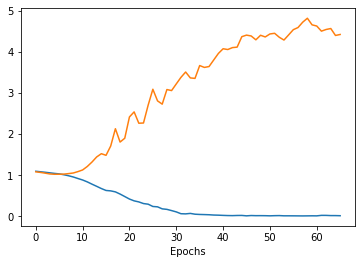

In [114]:
plt.ion()

fig = plt.figure()
plt.plot(train_loss)
plt.plot(valid_loss)
plt.xlabel('Epochs')
plt.show()

In [115]:
valid_loss, predicted, ytrue = validate(valid_data, model, args)

{'loss_eval': 4.4186882972717285}


In [116]:
len(predicted), len(ytrue), np.shape(predicted)

(256, 256, (256,))

In [117]:
evaluate_metrics('LSTM', predicted, ytrue)

Confusion matrix
[[60 57 17]
 [34 26 12]
 [25 18  7]]

Accuracy score: 0.36328125

Precision score: 0.31869062256365693

Recall score: 0.3162907683803206

F1 score: 0.3125590109172522



('LSTM', array([[60, 57, 17],
        [34, 26, 12],
        [25, 18,  7]]), 0.36328125, 0.31869062256365693, 0.3162907683803206, 0.3125590109172522)

In [118]:
torch.save(model,'model_lstm_last.pth')

## BERT

In [119]:
!pip install transformers datasets

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 298 kB 40.1 MB/s 
     |████████████████████████████████| 61 kB 460 kB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.9 MB/s 
     |████████████████████████████████| 895 kB 47.4 MB/s 
     |████████████████████████████████| 132 kB 46.1 MB/s 
     |████████████████████████████████| 243 kB 41.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 271 kB 43.9 MB/s 
     |████████████████████████████████| 192 kB 40.2 MB/s 
     |████████████████████████████████| 160 kB 45.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [120]:
from scipy.special import softmax

from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [121]:
task='sentiment'
model_name = f"cardiffnlp/twitter-roberta-base-{task}"
#model_name = "cardiffnlp/twitter-roberta-base-sentiment"
#model_name = 'cardiffnlp/twitter-roberta-base'
#pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)
pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [122]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
pt_model.save_pretrained(model_name)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [123]:
sentence = 'teste de tokenizador'
inputs = tokenizer.encode(sentence,truncation=True, padding=True,return_tensors='pt')
print(inputs)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tensor([[    0, 21959,   242,   263, 19233,  1210,  9618,     2]])


In [124]:
encoded_input = tokenizer(sentence,truncation=True, padding='max_length',return_tensors='pt')
encoded_input

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.


{'input_ids': tensor([[    0, 21959,   242,   263, 19233,  1210,  9618,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [125]:
pt_model(input_ids=encoded_input['input_ids'],attention_mask=encoded_input['attention_mask'])

SequenceClassifierOutput([('logits',
                           tensor([[-0.3106,  0.9651, -0.6427]], grad_fn=<AddmmBackward0>))])

In [126]:
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [127]:
text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = pt_model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
ranking = np.argsort(scores)
ranking = ranking[::-1]

labels = ['negative', 'neutral', 'positive'] 

for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

In [129]:
class TweetSentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    list(data['tweets']), list(data['labels']), test_size=0.3, random_state=42)

In [131]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_test, truncation=True, padding=True)

In [132]:
ds_train = TweetSentDataset(train_encodings,y_train)
ds_val  = TweetSentDataset(val_encodings,y_test)

### Fine tunning

In [133]:
from transformers import TrainingArguments
from transformers import Trainer

In [134]:
training_args = TrainingArguments("test_trainer", evaluation_strategy="epoch", num_train_epochs=3, save_strategy="epoch", load_best_model_at_end=True)

In [135]:
trainer = Trainer(
    model=pt_model, args=training_args, train_dataset=ds_train, eval_dataset=ds_val
)

In [136]:
trainer.train()

***** Running training *****
  Num examples = 716
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 270


Epoch,Training Loss,Validation Loss
1,No log,1.034401
2,No log,0.947066
3,No log,1.036207


***** Running Evaluation *****
  Num examples = 307
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-90
Configuration saved in test_trainer/checkpoint-90/config.json
Model weights saved in test_trainer/checkpoint-90/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 307
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-180
Configuration saved in test_trainer/checkpoint-180/config.json
Model weights saved in test_trainer/checkpoint-180/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 307
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-270
Configuration saved in test_trainer/checkpoint-270/config.json
Model weights saved in test_trainer/checkpoint-270/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from test_trainer/checkpoint-180 (score: 0.9470655918121338).


TrainOutput(global_step=270, training_loss=0.8718677662037037, metrics={'train_runtime': 264.381, 'train_samples_per_second': 8.125, 'train_steps_per_second': 1.021, 'total_flos': 153434178433368.0, 'train_loss': 0.8718677662037037, 'epoch': 3.0})

In [150]:
import numpy as np
from datasets import load_metric

metric1 = load_metric("accuracy")
metric2 = load_metric("precision")
metric3 = load_metric("recall")
metric4 = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = metric1.compute(predictions=predictions, references=labels)["accuracy"]
    prec = metric2.compute(predictions=predictions, references=labels, average="macro")["precision"]
    recall = metric3.compute(predictions=predictions, references=labels, average="macro")["recall"]
    f1 = metric4.compute(predictions=predictions, references=labels, average="macro")["f1"]
    return {"acc": acc, "prec": prec, "recall": recall, "f1":f1}

In [151]:
trainer = Trainer(
    model=pt_model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 307
  Batch size = 8


{'eval_acc': 0.5635179153094463,
 'eval_f1': 0.48709617563186064,
 'eval_loss': 0.9470655918121338,
 'eval_prec': 0.5278700627537837,
 'eval_recall': 0.4794753540705851,
 'eval_runtime': 6.9882,
 'eval_samples_per_second': 43.931,
 'eval_steps_per_second': 5.581}

In [177]:
labels = ['negative', 'neutral', 'positive'] 
labels

['negative', 'neutral', 'positive']

In [207]:
test_sent = ['kahoot é legal', 'kahoot é legal 😍', 'kahoot é legal 🤡', 'kahoot é legal 😊', 'kahoot é legal 😉', 'kahoot é legal 😉', 'kahoot é legal 🤔', 'kahoot é legal 🙃', 'ead tá triste']
input_enc = tokenizer(test_sent, truncation=True, padding=True, return_tensors='pt')
input_enc.to(device)
output = pt_model(**input_enc)
#print(output)

scores = output[0].cpu().detach().numpy()
scores = softmax(scores)
#print('scores:',scores, '\n')
for t, s in zip(test_sent ,scores):
  print( f'Phrase: {t}, Sentiment->  {labels[np.argmax(s)]}')

Phrase: kahoot é legal, Sentiment->  positive
Phrase: kahoot é legal 😍, Sentiment->  positive
Phrase: kahoot é legal 🤡, Sentiment->  negative
Phrase: kahoot é legal 😊, Sentiment->  positive
Phrase: kahoot é legal 😉, Sentiment->  positive
Phrase: kahoot é legal 😉, Sentiment->  positive
Phrase: kahoot é legal 🤔, Sentiment->  neutral
Phrase: kahoot é legal 🙃, Sentiment->  positive
Phrase: ead tá triste, Sentiment->  negative
